<a href="https://colab.research.google.com/github/rushi2012/Linear-Regression/blob/main/SeoulBikedata_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
#Importing Libraries

import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


In [227]:
#Import CSV file
SeoulBikeData = pd.read_csv('/content/SeoulBikeData.csv')
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [228]:
# Details
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [229]:
# Dataframe Head
sbd = SeoulBikeData
sbd.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [231]:
#Missing Value Informtion
miss_val = sbd.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

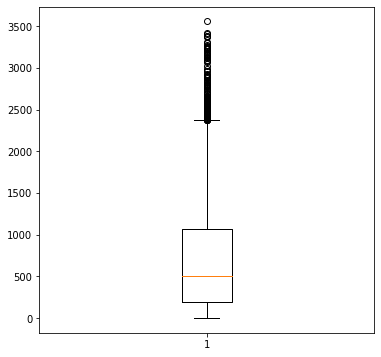

In [235]:
#Outliers Information for Rented Bike Count
plt.figure(figsize=(6,6))
plt.boxplot(sbd['Rented Bike Count'])
plt.show()

In [236]:
q1 = np.percentile(sbd['Rented Bike Count'], 25, interpolation = 'midpoint')
q3 = np.percentile(sbd['Rented Bike Count'], 75, interpolation = 'midpoint')
iqr = q3-q1
low_lmt = q1-(1.5*iqr)
up_lmt = q3+(1.5*iqr)
print(low_lmt)
print(up_lmt)


-1120.75
2377.25


In [237]:
sbd = sbd[sbd['Rented Bike Count']<up_lmt]
sbd = sbd[sbd['Rented Bike Count']>low_lmt]

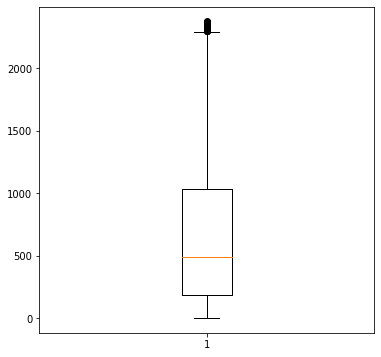

In [238]:
plt.figure(figsize=(6,6))
plt.boxplot(sbd['Rented Bike Count'])
plt.show()

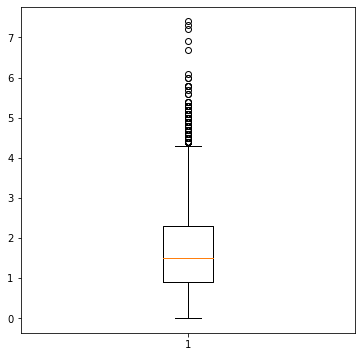

In [239]:
#Outlier Information for Wind Speed
plt.figure(figsize=(6,6))
plt.boxplot(sbd['Wind speed (m/s)'])
plt.show()

In [240]:
q1 = np.percentile(sbd['Wind speed (m/s)'], 25, interpolation = 'midpoint')
q3 = np.percentile(sbd['Wind speed (m/s)'], 75, interpolation = 'midpoint')
iqr = q3-q1
low_lmt = q1-(1.5*iqr)
up_lmt = q3+(1.5*iqr)
print(low_lmt)
print(up_lmt)

-1.1999999999999997
4.3999999999999995


In [241]:
sbd = sbd[sbd['Wind speed (m/s)']<up_lmt]
sbd = sbd[sbd['Wind speed (m/s)']>low_lmt]

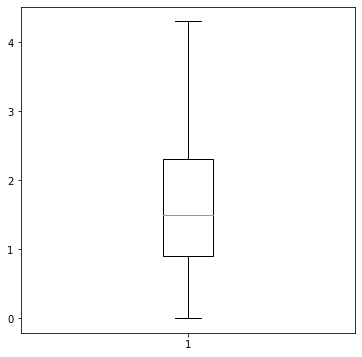

In [242]:
plt.figure(figsize=(6,6))
plt.boxplot(sbd['Wind speed (m/s)'])
plt.show()

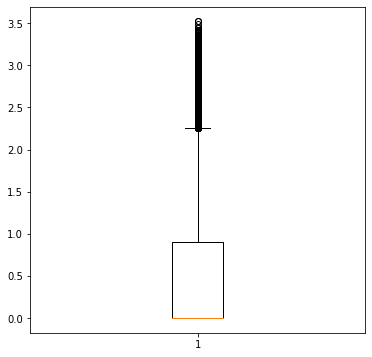

In [243]:
#Outlier Information for Solar Radiation
plt.figure(figsize=(6,6))
plt.boxplot(sbd['Solar Radiation (MJ/m2)'])
plt.show()

In [244]:
q1 = np.percentile(sbd['Solar Radiation (MJ/m2)'], 25, interpolation = 'midpoint')
q3 = np.percentile(sbd['Solar Radiation (MJ/m2)'], 75, interpolation = 'midpoint')
iqr = q3-q1
low_lmt = q1-(1.5*iqr)
up_lmt = q3+(1.5*iqr)
print(low_lmt)
print(up_lmt)

-1.35
2.25


In [245]:
sbd = sbd[sbd['Solar Radiation (MJ/m2)']<up_lmt]
sbd = sbd[sbd['Solar Radiation (MJ/m2)']>low_lmt]

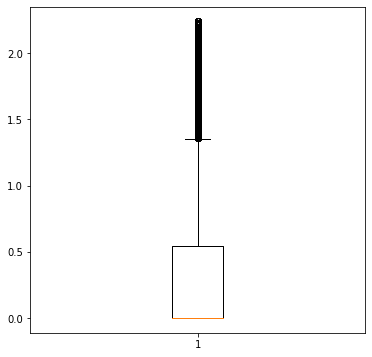

In [246]:
plt.figure(figsize=(6,6))
plt.boxplot(sbd['Solar Radiation (MJ/m2)'])
plt.show()

In [247]:
#Correlation Matirx
corr = sbd.corr()
corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.400517,0.533168,-0.162957,0.106349,0.188051,0.381486,0.248899,-0.125173,-0.140926
Hour,0.400517,1.000000,0.098512,-0.226957,0.279841,0.086136,-0.011491,0.144502,0.012919,-0.013805
Temperature(C),0.533168,0.098512,1.000000,0.258581,-0.081031,0.004416,0.926904,0.246831,0.066321,-0.215724
Humidity(%),-0.162957,-0.226957,0.258581,1.000000,-0.300416,-0.545389,0.591577,-0.389027,0.237412,0.098863
Wind speed (m/s),0.106349,0.279841,-0.081031,-0.300416,1.000000,0.162613,-0.190484,0.287703,-0.014117,0.007440
Visibility (10m),0.188051,0.086136,0.004416,-0.545389,0.162613,1.000000,-0.192794,0.114031,-0.166442,-0.119595
Dew point temperature(C),0.381486,-0.011491,0.926904,0.591577,-0.190484,-0.192794,1.000000,0.040846,0.134135,-0.149055
Solar Radiation (MJ/m2),0.248899,0.144502,0.246831,-0.389027,0.287703,0.114031,0.040846,1.000000,-0.066099,-0.050075
Rainfall(mm),-0.125173,0.012919,0.066321,0.237412,-0.014117,-0.166442,0.134135,-0.066099,1.000000,0.006405
Snowfall (cm),-0.140926,-0.013805,-0.215724,0.098863,0.007440,-0.119595,-0.149055,-0.050075,0.006405,1.000000


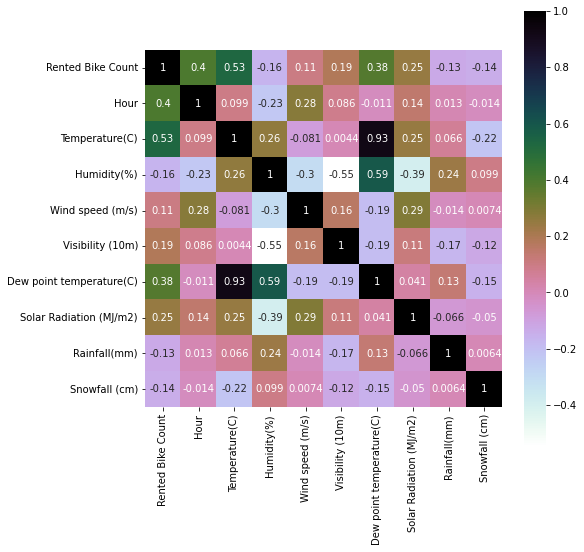

In [248]:
#Correlation Heatmap
corr = sbd.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [249]:
#Drop Date Column
sbd = sbd.drop(['Date'], axis=1)

In [255]:
#Verify Dataframe tail information
sbd.tail()
df=sbd
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [257]:
# Label Encoder for dummy variables
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Seasons'] = en.fit_transform(df['Seasons'])
df['Holiday'] = en.fit_transform(df['Holiday'])
df['Functioning Day'] = en.fit_transform(df['Functioning Day'])

In [258]:
#df = df.drop(['Holiday', 'Functioning Day'], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [260]:
#Correlation Mean
corr.mean()

Rented Bike Count           0.242941
Hour                        0.177017
Temperature(C)              0.283798
Humidity(%)                 0.056169
Wind speed (m/s)            0.125790
Visibility (10m)            0.053103
Dew point temperature(C)    0.253112
Solar Radiation (MJ/m2)     0.157761
Rainfall(mm)                0.108536
Snowfall (cm)               0.042353
dtype: float64

In [261]:
#Train and Test data split with test size 0.25
from sklearn.model_selection import train_test_split 
df, val = train_test_split(df, test_size =0.25, random_state = 40)

In [262]:
df_x = df.drop(['Rented Bike Count'], axis = 1)
df_y = df['Rented Bike Count']             

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

print('Dimension of SeoulBikeData_x dataframe:',df_x.shape)
print('Dimension of SeoulBikeData_y dataframe:',df_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of SeoulBikeData_x dataframe: (5814, 12)
Dimension of SeoulBikeData_y dataframe: (5814,)
Dimension of val_x dataframe: (1938, 12)
Dimension of val_y dataframe: (1938,)


In [263]:
print(df_x)

      Hour  Temperature(C)  Humidity(%)  ...  Seasons  Holiday  Functioning Day
2296    16            10.6           26  ...        1        1                1
889      1            -3.9           51  ...        3        1                1
6622    22            25.7           64  ...        0        1                1
220      4             0.4           52  ...        3        1                1
334     22            -4.9           44  ...        3        1                1
...    ...             ...          ...  ...      ...      ...              ...
3304    16            19.5           28  ...        1        1                1
7235    11            17.9           54  ...        0        1                0
7051    19            18.9           78  ...        0        1                1
7299     3            13.6           56  ...        0        1                1
3704     8            11.3           46  ...        1        1                1

[5814 rows x 12 columns]


In [264]:
#Linear Regression
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(df_x, df_y)

LinearRegression()

In [265]:
# Mean Absolute, Mean Square Error, R_square score information
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(val_y, df_pred))

Mean Absolute Error of linear regression: 299.5640387595413
Mean Square Error of linear regression: 151232.89424508932
R_Squared Score of linear regression: 0.561982571482591


In [266]:
#Model Accuracy
lr = ln_reg.score(df_x, df_y)
print('Accuracy of the model :', lr)
print('Model coefficients :', ln_reg.coef_)
print('Model intercept value :', ln_reg.intercept_)


Accuracy of the model : 0.5561871212351037
Model coefficients : [ 2.52327192e+01  1.80028092e+01 -8.74326444e+00  1.80772830e+01
  2.81716967e-02  1.00361983e+01 -3.07970089e+01 -5.90471699e+01
  2.12608819e+01 -9.14540811e+01  1.29196960e+02  9.10573459e+02]
Model intercept value : -272.781991955149
